In [1]:
import pandas as pd
import numpy as np

Problem 1: Frequentist hypothesis testing

*Null Hypothesis (H0):* There is no significant difference between Version A and Version B in visitor conversion rates.

In [2]:
from statsmodels.stats.proportion import proportions_ztest

conversions = np.array([150, 180])
visitors = np.array([5000, 5000])

z_stat_2, p_val_2 = proportions_ztest(conversions, visitors, alternative='two-sided')

print('Two-tailed z-test')
print('-------------------')
print('z-statistic: ', z_stat_2)
print('p-value: ', p_val_2)

z_stat_1, p_val_1 = proportions_ztest(conversions, visitors, alternative='smaller')
print('\nOne-tailed z-test')
print('-------------------')
print('z-statistic: ', z_stat_1)
print('p-value: ', p_val_1)


Two-tailed z-test
-------------------
z-statistic:  -1.6793880081678563
p-value:  0.09307644886114144

One-tailed z-test
-------------------
z-statistic:  -1.6793880081678563
p-value:  0.04653822443057072


The two-tailed and one-tailed z-statistic share the same value of -1.67, while the p-value for the two-tailed test is double that of the one-tailed test. Based on the z-statistic of 1.67 for the two-tailed z-test, there is no significant difference between the two versions. The critical value for a two-tailed z-test with significance level of 0.05 is 1.96. Because the z-statistic is lower than this critical value, no significant difference can be concluded. Similarly, the p-value is greater than the significance level of 0.05, indicating an acceptance of the null hypothesis. However, the critical value for a one-tailed z-test is 1.645. Given that the z-statistic is higher than this critical value, significant difference between Version A and Version B can be assumed. Additionally, a p-value of 0.046 is lower than the significance level of 0.05, indicating rejection of the null hypothesis and acceptance of the alternative hypothesis.

Problem 2: Bayesian hypothesis testing

In [3]:
from scipy.stats import beta
import matplotlib.pyplot as plt

# using this article to conduct Bayesian A/B testing
# https://patonv.medium.com/bayesian-a-b-testing-in-python-a-step-by-step-walkthrough-ad1bd6358b24

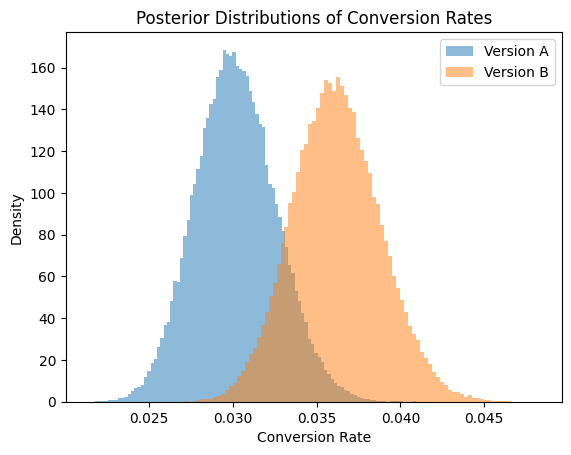

The probability that version B is better than version A:  0.95347


In [4]:
alpha_prior = 1
beta_prior = 1

post_A = beta(alpha_prior + conversions[0], beta_prior + visitors[0] - conversions[0])
post_B = beta(alpha_prior + conversions[1], beta_prior + visitors[1] - conversions[1])

# use mcmc to draw samples
samples = 100000
samples_A = post_A.rvs(samples)
samples_B = post_B.rvs(samples)

plt.hist(samples_A, bins=100, alpha=0.5, label='Version A', density=True)
plt.hist(samples_B, bins=100, alpha=0.5, label='Version B', density=True)
plt.title('Posterior Distributions of Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

print('The probability that version B is better than version A: ', np.mean(samples_B > samples_A))

Problem 3: Logistic Regression (classification)

In [5]:
# full dataset classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_set = pd.read_json('HW3.jsonl', lines=True)
features = ['x','y']
X = df_set[features]
y = df_set['l']
regression_mod = LogisticRegression(solver='liblinear')
regression_mod.fit(X,y)

y_pred = regression_mod.predict(X)

print('accuracy: ', accuracy_score(y, y_pred))
print('precision: ', precision_score(y, y_pred))
print('recall: ', recall_score(y, y_pred))
print('f1: ', f1_score(y, y_pred))

accuracy:  0.891
precision:  0.8886679920477137
recall:  0.894
f1:  0.8913260219341974


In [8]:
from sklearn.model_selection import train_test_split

acc = []
prec = []
recall = []
f1 = []

for i in range(100):
    x_train, x_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, stratify=y)
    x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, train_size=0.5, stratify=y_rem)
    model_split = LogisticRegression(solver='liblinear')
    model_split.fit(x_train, y_train)

    y_pred_2 = model_split.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred_2))
    prec.append(precision_score(y_test, y_pred_2))
    recall.append(recall_score(y_test, y_pred_2))
    f1.append(f1_score(y_test, y_pred_2))

print('accuracy: ', np.mean(acc))
print('precision: ', np.mean(prec))
print('recall: ', np.mean(recall))
print('f1: ', np.mean(f1))

accuracy:  0.8956000000000002
precision:  0.8922429621797129
recall:  0.9009
f1:  0.8961190316616885


Text(0, 0.5, 'Frequency')

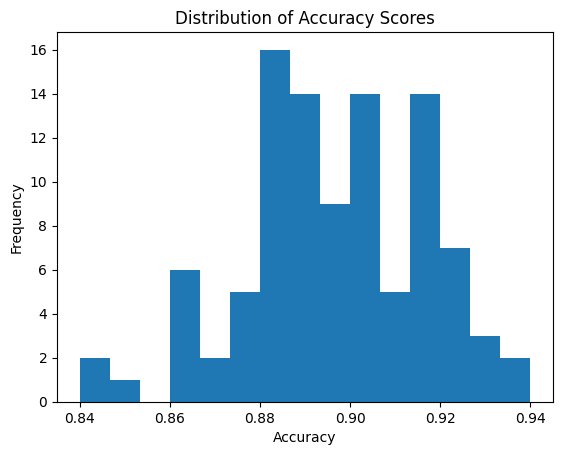

In [12]:
plt.hist(acc, bins=15)
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

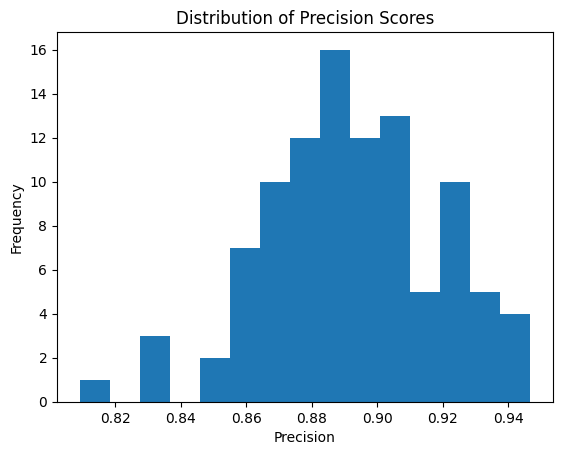

In [13]:
plt.hist(prec, bins=15)
plt.title('Distribution of Precision Scores')
plt.xlabel('Precision')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

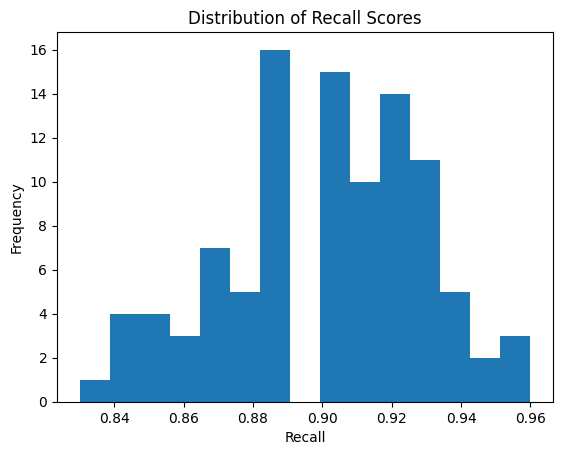

In [14]:
plt.hist(recall, bins=15)
plt.title('Distribution of Recall Scores')
plt.xlabel('Recall')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

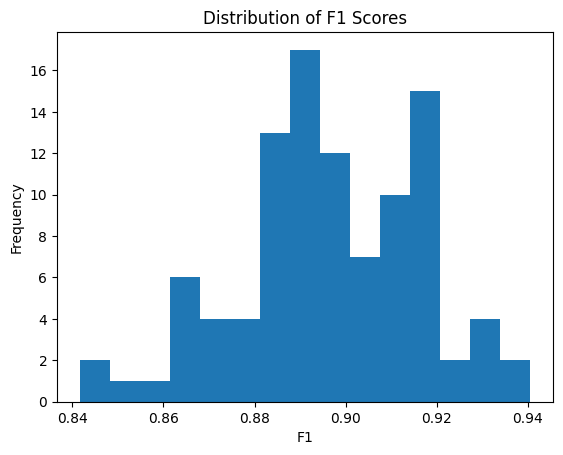

In [15]:
plt.hist(f1, bins=15)
plt.title('Distribution of F1 Scores')
plt.xlabel('F1')
plt.ylabel('Frequency')

Based on the accuracy, precision, recall, and F1 scores calculated after the 100 fold validation, there is an increase in all performance metrics when the model is trained on an 80/10/10 split. While all the distributions of the metrics seem to follow a normal distribution (clearer with an increase in trials, for example, a 1000 fold validation), with a mean value higher than the respective value from the original prediction metrics trained on the full dataset. Given that the accuracy, precision, recall, and F1 score are all higher, we can believe that the model trained using the train/test split will perform better on unseen data in comparison to the model trained on the full dataset. This also goes in line with the idea that the model trained on the full dataset may be overfitted, and thus will have a more difficult time predicting outcomes on unseen data.

Text(0.5, 1.0, 'Initial Logistic Regression Data')

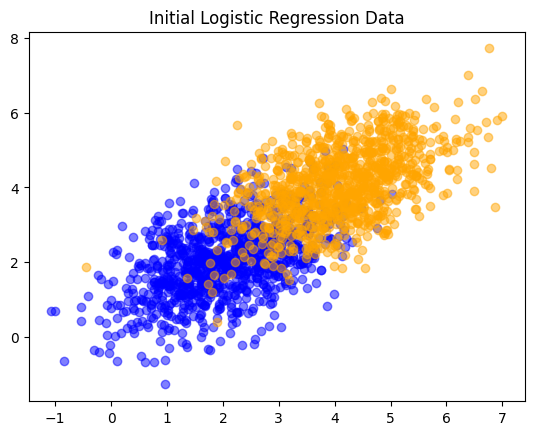

In [31]:
from sklearn.inspection import DecisionBoundaryDisplay

for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(X['x'][i],X['y'][i],alpha=0.5, color='blue',label='0')
    elif y[i] == 1:
        plt.scatter(X['x'][i],X['y'][i], alpha=0.5, color='orange',label='1')
plt.title('Initial Logistic Regression Data')


c:\Users\VictoriaAgain\ds-3001\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


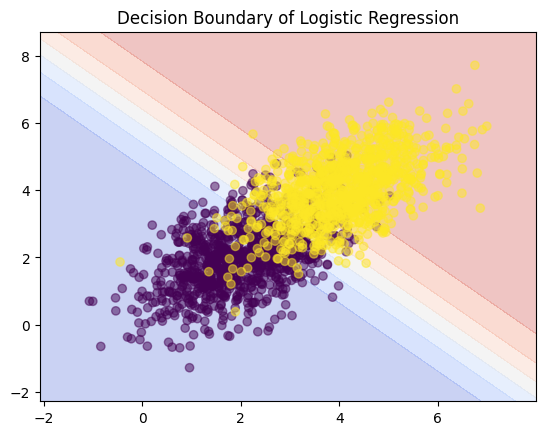

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression(solver='liblinear')
model.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    model,
    X.values,
    response_method="predict_proba",  # important for logistic regression
    alpha=0.3,
    cmap='coolwarm'
)

plt.scatter(X.values[:, 0], X.values[:, 1], c=y, alpha=0.5)
plt.title('Decision Boundary of Logistic Regression')
plt.show()